In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os

In [4]:
ROADS_1 = ['A. Maceda', 'Anda Circle', 'Antipolo',
         'Bluementritt', 'Buendia', 'Edsa Extension', 'Finance Road', 
         'Gov. Forbes - Lacson', 'Lerma', 'Magsaysay Ave', 'P.Noval', 'Pablo Ocampo', 'Pedro Gil', 
         'Quezon Ave.', 'Quirino', 'Rajah Sulayman', 'Taft Ave.', 'U.N. Avenue',
         'Vicente Cruz']

YEAR = "2015"
EXT = ".csv"

DATASET_DIR = "../../../../datasets/analysis/"
DATASET_DIVISION = "transformed"

In [30]:
def getAllHighCorr(dataset, limit):
    features = dataset.columns
    hc_features = []
    for w in range(0, len(features)):
        #print('Highly correlated with ' + w)
        col_name = features[w]
        col = dataset[col_name]
        temp = col[((col <= -limit) | (col >= limit))]
        hc_features.append(temp)
        #print(col[col>=0.5])
        #print('\n')
        
        
    for w in range(1, len(features)-1):
        hc_features[w] = hc_features[w].to_frame()
        print(hc_features[w])
        print('\n')
        
    return hc_features

## Non-Rolling

In [363]:
CORR_NR = []
for r in range(len(ROADS_1)):
    if DATASET_DIVISION == "transformed":
        df = pd.read_csv(DATASET_DIR + "/" + DATASET_DIVISION + "/" 
                         + ROADS_1[r] + "_" + YEAR + "_" + DATASET_DIVISION + EXT,
                         skipinitialspace=True)
        df = df.rename(columns={df.columns[0]:"Features"})
        CORR_NR.append(df)

In [364]:
CORR_NR[0]

,Features,statusN,statusS,tempC,windspeedMiles,precipMM,humidity,visibility,pressure,cloudcover,heatIndexC,dewPointC,windChillC,windGustMiles,feelsLikeC
0,statusN,1.000000,0.262680,-0.279077,-0.139531,-0.004083,0.303724,-0.017006,-0.069216,0.049658,-0.242685,0.010738,-0.279132,-0.093123,-0.242687
1,statusS,0.262680,1.000000,-0.079060,-0.080871,-0.009340,0.099526,0.059495,0.025023,0.043493,-0.054740,0.021913,-0.079025,-0.080284,-0.054724
2,tempC,-0.279077,-0.079060,1.000000,0.037847,0.133854,-0.812580,-0.018048,-0.318228,-0.126530,0.966173,0.311154,0.999923,-0.095061,0.966174
3,windspeedMiles,-0.139531,-0.080871,0.037847,1.000000,-0.010365,-0.222899,-0.080579,0.100699,0.036130,-0.037059,-0.330290,0.038384,0.963186,-0.037048
4,precipMM,-0.004083,-0.009340,0.133854,-0.010365,1.000000,0.210749,-0.649711,-0.573338,0.502911,0.251419,0.602499,0.133765,0.062283,0.251432
5,humidity,0.303724,0.099526,-0.812580,-0.222899,0.210749,1.000000,-0.238559,-0.064527,0.261018,-0.688277,0.212654,-0.812681,-0.078113,-0.688278
6,visibility,-0.017006,0.059495,-0.018048,-0.080579,-0.649711,-0.238559,1.000000,0.425126,-0.421367,-0.109926,-0.406823,-0.018181,-0.155110,-0.109904
7,pressure,-0.069216,0.025023,-0.318228,0.100699,-0.573338,-0.064527,0.425126,1.000000,-0.315732,-0.434535,-0.642700,-0.318135,0.086155,-0.434526
8,cloudcover,0.049658,0.043493,-0.126530,0.036130,0.502911,0.261018,-0.421367,-0.315732,1.000000,-0.050369,0.230471,-0.126178,0.125698,-0.050369
9,heatIndexC,-0.242685,-0.054740,0.966173,-0.037059,0.251419,-0.688277,-0.109926,-0.434535,-0.050369,1.000000,0.502869,0.966150,-0.156878,0.999999


In [365]:
ROADS_SB_C = []
ROADS_NB_C = []

for r in range(len(ROADS_1)):
    #Analyzing Weather to Traffic 
    feature = 0 #NorthBound
    df = CORR_NR[r].loc[[feature]]  
    ROADS_NB_C.append(df)    
    
    feature = 1 #SouthBound
    df = CORR_NR[r].loc[[feature]]  
    ROADS_SB_C.append(df)    

tempC


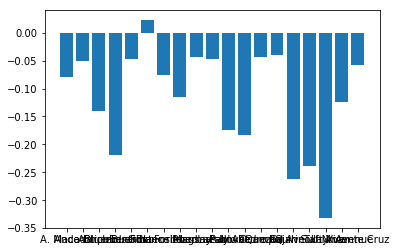

windspeedMiles


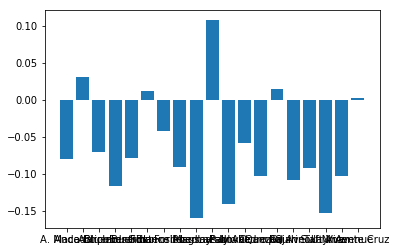

precipMM


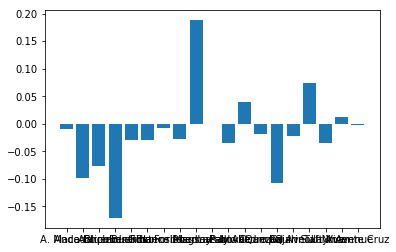

humidity


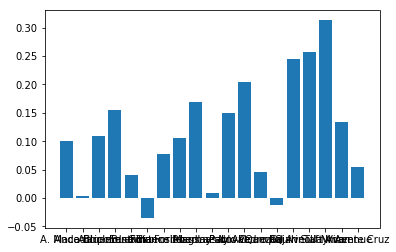

visibility


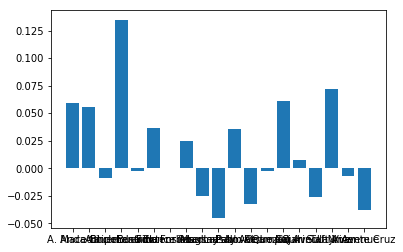

pressure


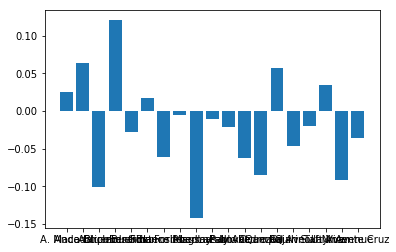

cloudcover


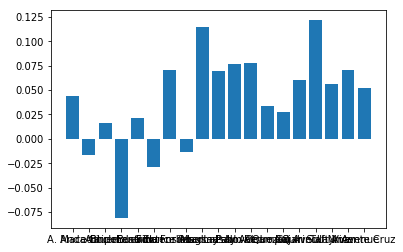

heatIndexC


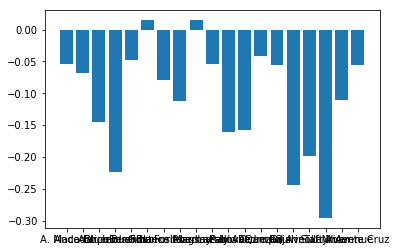

dewPointC


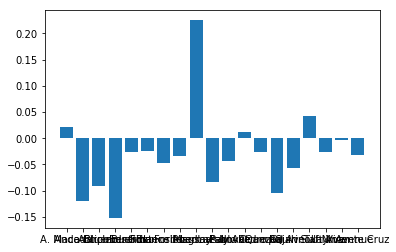

windChillC


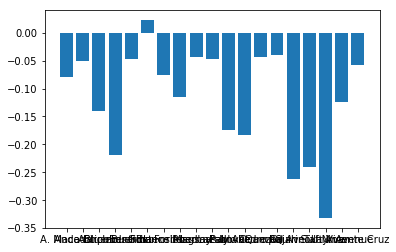

windGustMiles


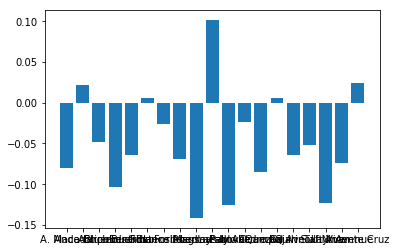

feelsLikeC


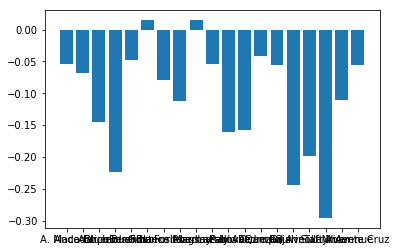

In [366]:
y = []
FEATURES = ROADS_SB_C[0].columns
for f in range(3, len(ROADS_SB_C[0].columns)): 
    y = []
    for r in ROADS_SB_C:
        y.append(r.iloc[0, f])
    print(ROADS_SB_C[0].columns[f])
    plt.bar(ROADS_1, y)
    plt.show()


## Rolling

In [355]:
CORR_R = []
for r in range(len(ROADS_1)):
    if DATASET_DIVISION == "transformed":
        df = pd.read_csv(DATASET_DIR + "rolling_" + DATASET_DIVISION + "/" 
                         "rolling-" + DATASET_DIVISION + "_" + ROADS_1[r] + "_" + YEAR + "_" + DATASET_DIVISION + EXT,
                         skipinitialspace=True)
        df = df.rename(columns={df.columns[0]:"Features"})
        CORR_R.append(df)

In [356]:
CORR_R[0]

,Features,statusN,statusS,statusN_Rmean=2,statusS_Rmean=2,statusN_Rmin=2,statusS_Rmin=2,statusN_Rmax=2,statusS_Rmax=2,statusN_Rmean=3,...,precipMM_Rmax=96,humidity_Rmax=96,visibility_Rmax=96,pressure_Rmax=96,cloudcover_Rmax=96,heatIndexC_Rmax=96,dewPointC_Rmax=96,windChillC_Rmax=96,windGustMiles_Rmax=96,feelsLikeC_Rmax=96
0,statusN,1.000000,0.262680,0.989989,0.256206,0.986748,0.255871,0.987007,0.257115,0.971999,...,0.041187,0.030255,-0.060881,-0.106274,0.036232,0.017149,0.065834,-0.001158,0.021575,0.017149
1,statusS,0.262680,1.000000,0.269048,0.990489,0.272123,0.985720,0.264673,0.985882,0.276788,...,0.039899,0.118979,-0.021417,0.001166,0.051961,-0.028631,0.064815,-0.074150,0.034907,-0.028631
2,statusN_Rmean=2,0.989989,0.269048,1.000000,0.263008,0.992667,0.262699,0.990967,0.263901,0.991042,...,0.041409,0.029654,-0.060618,-0.106337,0.037050,0.016764,0.065825,-0.001384,0.022254,0.016764
3,statusS_Rmean=2,0.256206,0.990489,0.263008,1.000000,0.266161,0.991105,0.258523,0.989934,0.271188,...,0.040263,0.118987,-0.020952,0.000468,0.052086,-0.028299,0.065185,-0.074000,0.035688,-0.028299
4,statusN_Rmin=2,0.986748,0.272123,0.992667,0.266161,1.000000,0.266402,0.976174,0.266384,0.987208,...,0.043438,0.030084,-0.064752,-0.106607,0.039689,0.014595,0.066910,-0.003624,0.027779,0.014595
5,statusS_Rmin=2,0.255871,0.985720,0.262699,0.991105,0.266402,1.000000,0.257664,0.973123,0.270965,...,0.045645,0.125200,-0.021955,0.000726,0.056336,-0.029105,0.071849,-0.078413,0.036913,-0.029105
6,statusN_Rmax=2,0.987007,0.264673,0.990967,0.258523,0.976174,0.257664,1.000000,0.260057,0.985376,...,0.039460,0.029714,-0.055700,-0.106118,0.033417,0.020101,0.065129,0.001822,0.015469,0.020101
7,statusS_Rmax=2,0.257115,0.985882,0.263901,0.989934,0.266384,0.973123,0.260057,1.000000,0.271818,...,0.034999,0.111893,-0.019802,0.001142,0.048047,-0.027313,0.058051,-0.069188,0.033677,-0.027313
8,statusN_Rmean=3,0.971999,0.276788,0.991042,0.271188,0.987208,0.270965,0.985376,0.271818,1.000000,...,0.041846,0.029971,-0.060429,-0.106892,0.037311,0.017174,0.066372,-0.000987,0.022332,0.017174
9,statusS_Rmean=3,0.249492,0.970611,0.256571,0.989251,0.259714,0.987208,0.252039,0.983755,0.265134,...,0.041036,0.118830,-0.020604,0.000453,0.052612,-0.028192,0.065736,-0.074217,0.036261,-0.028192


## Traffic to Weather

### Rolling Mean Analysis

In [357]:
WINDOWS = [2,3,4,8,12,24,32,48,96]
FEATURES = CORR_R[0].columns

In [358]:
ROADS_SB_CR = []
ROADS_NB_CR = []

for r in range(len(ROADS_1)):
    #Analyzing Weather to Traffic 
    feature = 0 #NorthBound
    df = CORR_R[r].loc[[feature]]  
    ROADS_NB_CR.append(df)    
    
    feature = 1 #SouthBound
    df = CORR_R[r].loc[[feature]]  
    ROADS_SB_CR.append(df)    

In [359]:
rMean = []
for w in WINDOWS:
    rMeanColumns = []
    window = w
    #Figuring out what columns are rolling mean
    for c in range(len(CORR_R[0].columns)):
        col = ROADS_SB_CR[0].columns[c]
        for f in FEATURES:
            if((f+"_Rmean=" + str(window)) == col):
                rMeanColumns.append(c)
    rMean.append(rMeanColumns)

In [360]:
ROADS_SB_CR[0]

,Features,statusN,statusS,statusN_Rmean=2,statusS_Rmean=2,statusN_Rmin=2,statusS_Rmin=2,statusN_Rmax=2,statusS_Rmax=2,statusN_Rmean=3,...,precipMM_Rmax=96,humidity_Rmax=96,visibility_Rmax=96,pressure_Rmax=96,cloudcover_Rmax=96,heatIndexC_Rmax=96,dewPointC_Rmax=96,windChillC_Rmax=96,windGustMiles_Rmax=96,feelsLikeC_Rmax=96
1,statusS,0.26268,1.0,0.269048,0.990489,0.272123,0.98572,0.264673,0.985882,0.276788,...,0.039899,0.118979,-0.021417,0.001166,0.051961,-0.028631,0.064815,-0.07415,0.034907,-0.028631


#### One Graph = One Road, All Features of Window w

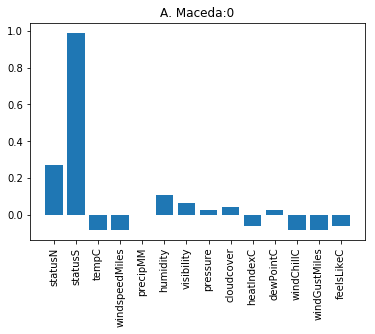

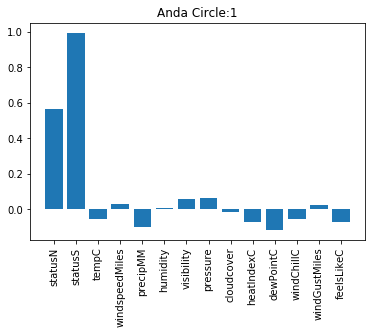

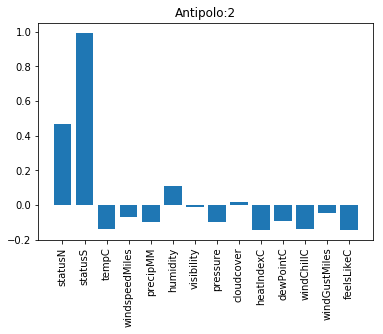

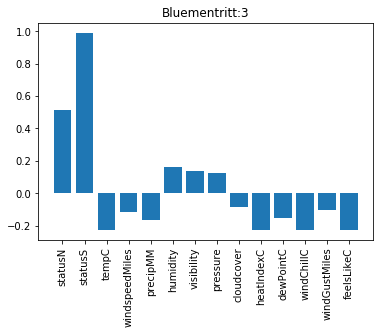

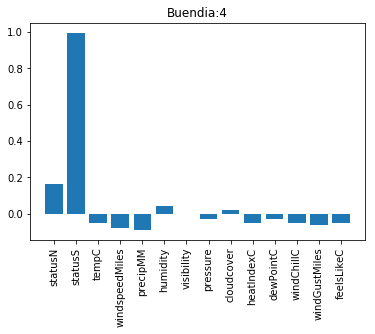

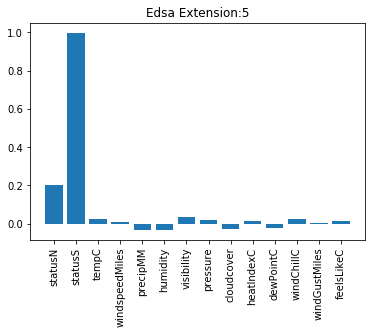

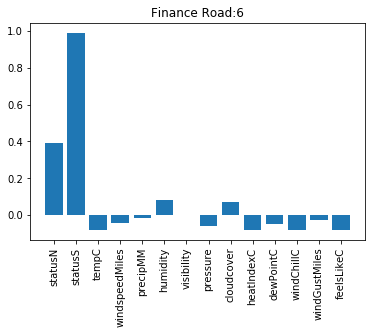

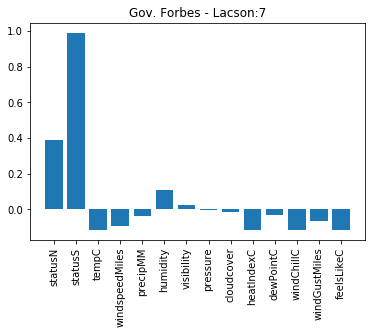

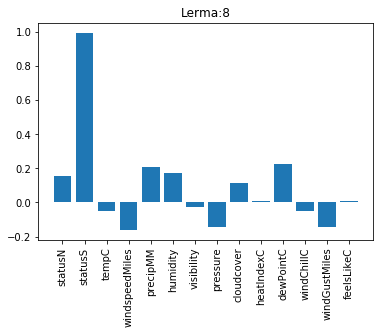

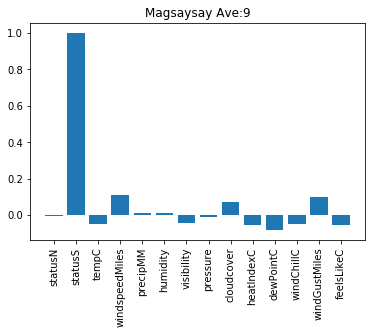

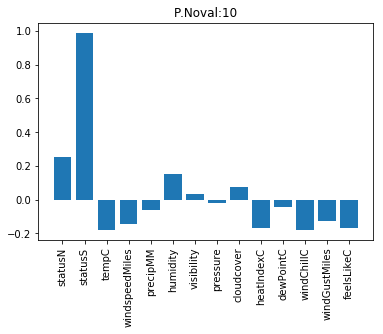

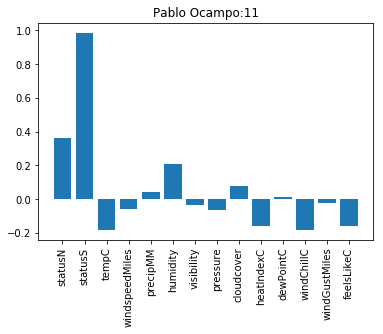

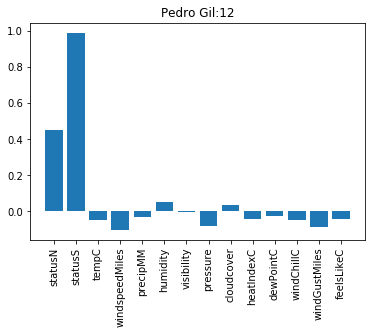

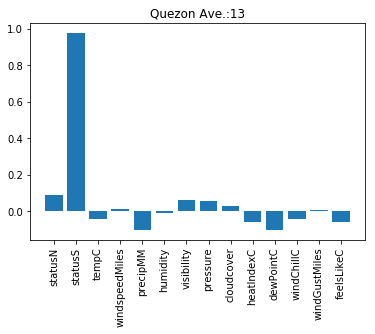

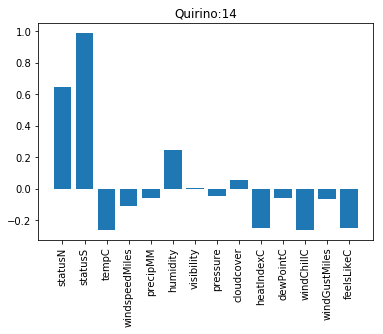

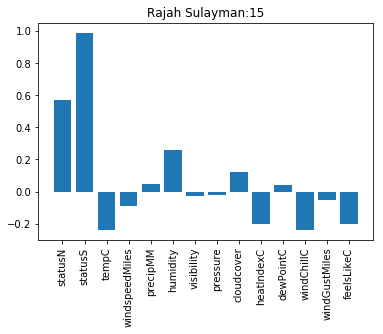

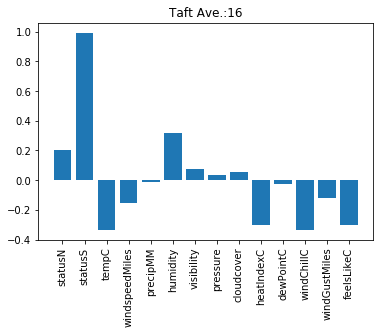

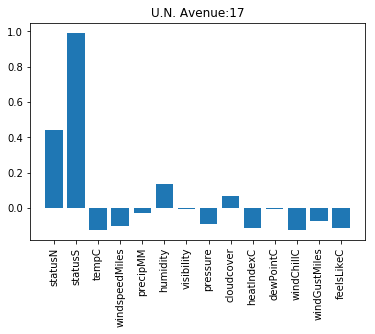

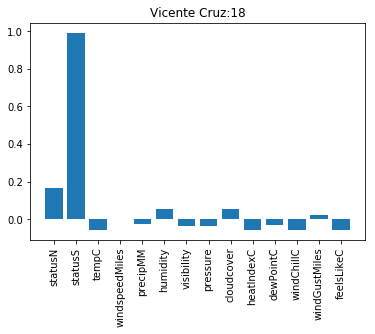

In [562]:
# for W=1
w = 0

yGroup = []
fin = False
for r in range(len(ROADS_1)): 
    y = []
    for f in range(3, len(ROADS_SB_CR[r].columns)):
        if f not in rMean[w]:
            fin = False
            continue
        y.append(ROADS_SB_CR[r].iloc[0, f])
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.title(ROADS_1[r] + ":" + str(r))

    plt.show()

#### All Graph = Road r.  One Graph = Window of All Features

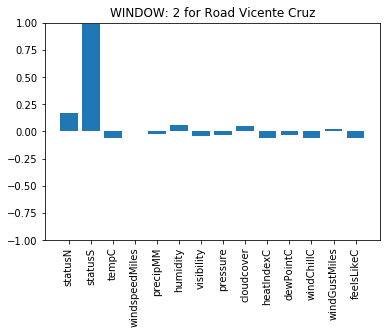

Max for WINDOW 2:0.059413814906688935



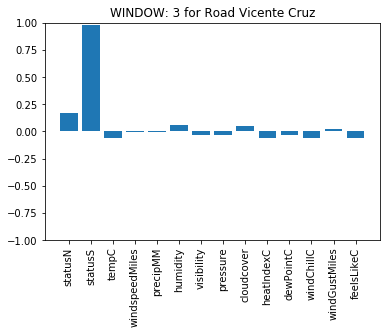

Max for WINDOW 3:0.062010336374863084



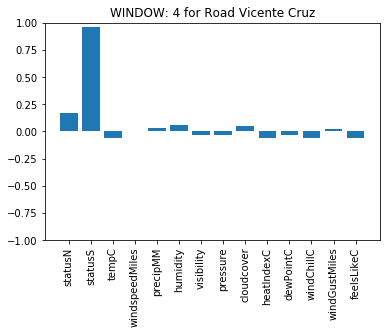

Max for WINDOW 4:0.06019320297667461



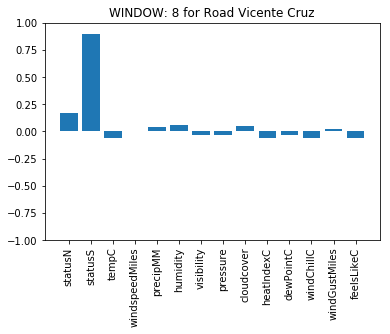

Max for WINDOW 8:0.06332397265329426



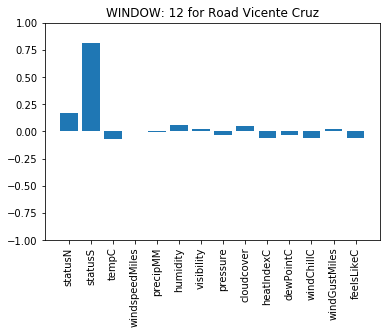

Max for WINDOW 12:0.06486155078277413



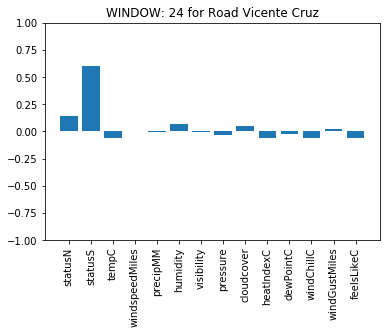

Max for WINDOW 24:0.0652878985798388



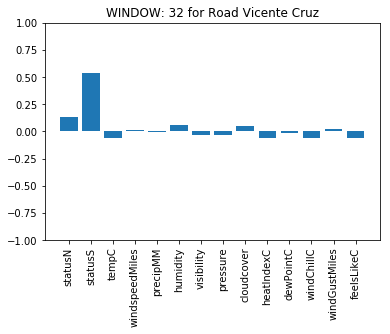

Max for WINDOW 32:0.06217769280373516



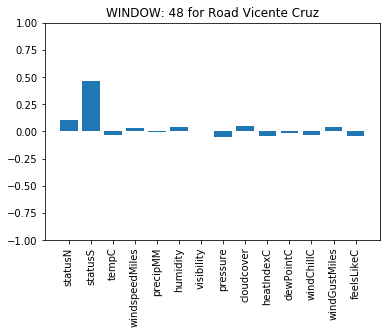

Max for WINDOW 48:0.05002779434352742



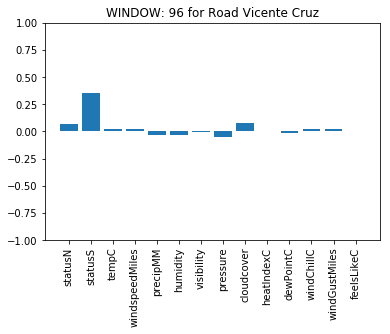

Max for WINDOW 96:0.07855733366388425
Max: 0.07855733366388425
Found in Window: 96


In [598]:
r = 18

maxes = []

fig, ax = plt.subplots()
yGroup = []
fin = False
for w in range(len(WINDOWS)): 
    y = []
    for f in range(3, len(ROADS_SB_CR[r].columns)):
        if f not in rMean[w]:
            continue
        y.append(ROADS_SB_CR[r].iloc[0, f])
    print()
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.ylim(ymin=-1, ymax=1)
    plt.title("WINDOW: " + str(WINDOWS[w]) + " for Road " + ROADS_1[r])    
    plt.show()
        
    print("Max for WINDOW " + str(WINDOWS[w]) + ":" + str(np.absolute(y[2:]).max()))
    maxes.append(np.absolute(y[2:]).max())
    
print("===============")
print("Max: " + str(np.amax(maxes)))
print("Found in Window: " + str(WINDOWS[np.argmax(maxes)]))

#### One Graph = One Feature for all Windows of all Roads

precipMM for Road: A. Maceda
precipMM_Rmean=2 : -2.024440204967543e-05 : 71
precipMM_Rmean=3 : -0.007018201777863503 : 107
precipMM_Rmean=4 : -0.019982281476730517 : 143
precipMM_Rmean=8 : -0.07506291478445125 : 179
precipMM_Rmean=12 : -0.016414825679032526 : 215
precipMM_Rmean=24 : -0.041873521796929214 : 251
precipMM_Rmean=32 : 0.0005131545319262405 : 287
precipMM_Rmean=48 : 0.027596579461395897 : 323
precipMM_Rmean=96 : 0.03911005467021839 : 359
Max for Road A. Maceda:0.07506291478445125


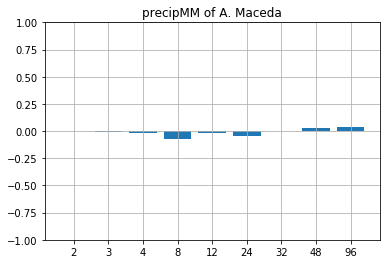

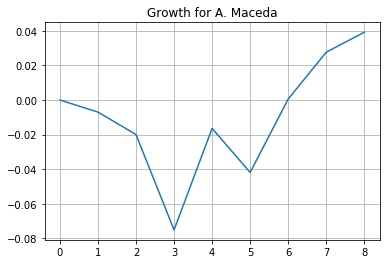

precipMM for Road: Anda Circle
precipMM_Rmean=2 : -0.10407247326170288 : 71
precipMM_Rmean=3 : -0.08365815427129185 : 107
precipMM_Rmean=4 : -0.06357239962545445 : 143
precipMM_Rmean=8 : -0.0507653021258563 : 179
precipMM_Rmean=12 : -0.08288353412629768 : 215
precipMM_Rmean=24 : -0.09365320909222156 : 251
precipMM_Rmean=32 : -0.08293690675246505 : 287
precipMM_Rmean=48 : -0.09638675853808833 : 323
precipMM_Rmean=96 : -0.14031406649286154 : 359
Max for Road Anda Circle:0.14031406649286154


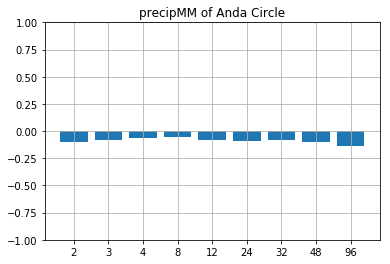

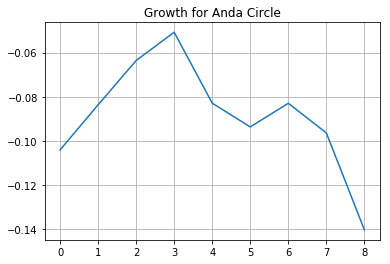

precipMM for Road: Antipolo
precipMM_Rmean=2 : -0.09780990007279383 : 71
precipMM_Rmean=3 : -0.08815978132287408 : 107
precipMM_Rmean=4 : -0.029170796358831567 : 143
precipMM_Rmean=8 : 0.07480732178275817 : 179
precipMM_Rmean=12 : -0.061258452276046274 : 215
precipMM_Rmean=24 : 0.010628544398268257 : 251
precipMM_Rmean=32 : -0.021616177917846358 : 287
precipMM_Rmean=48 : -0.013037201984786265 : 323
precipMM_Rmean=96 : -0.041341857172466176 : 359
Max for Road Antipolo:0.09780990007279383


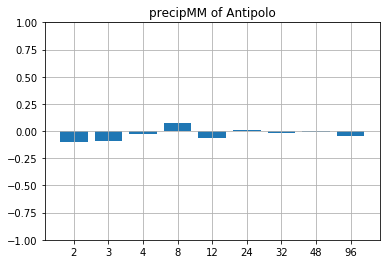

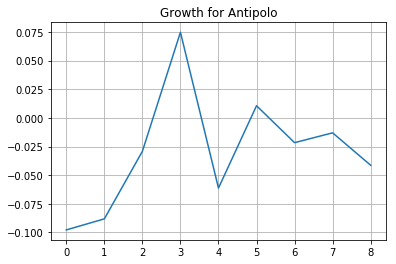

precipMM for Road: Bluementritt
precipMM_Rmean=2 : -0.16702471043227718 : 71
precipMM_Rmean=3 : -0.15663478487345306 : 107
precipMM_Rmean=4 : -0.16567724898993302 : 143
precipMM_Rmean=8 : -0.16989816190188 : 179
precipMM_Rmean=12 : -0.16603014313861794 : 215
precipMM_Rmean=24 : -0.13180694515829094 : 251
precipMM_Rmean=32 : -0.12265794687778205 : 287
precipMM_Rmean=48 : -0.1060231154178931 : 323
precipMM_Rmean=96 : -0.11838009518180095 : 359
Max for Road Bluementritt:0.16989816190188


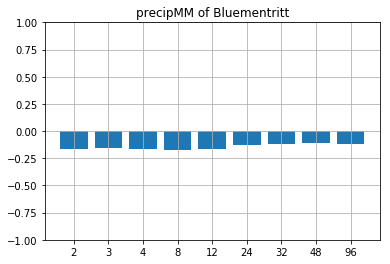

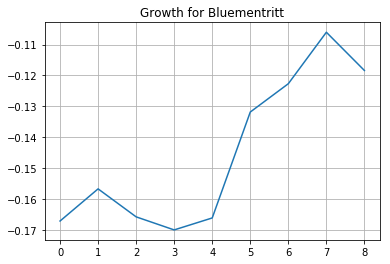

precipMM for Road: Buendia
precipMM_Rmean=2 : -0.09022793128184092 : 71
precipMM_Rmean=3 : -0.06269495443045314 : 107
precipMM_Rmean=4 : 0.006166395339384814 : 143
precipMM_Rmean=8 : 0.04485536743501662 : 179
precipMM_Rmean=12 : -0.04150910446038487 : 215
precipMM_Rmean=24 : -0.04328769669789557 : 251
precipMM_Rmean=32 : -0.0698347673839536 : 287
precipMM_Rmean=48 : -0.05764073341949709 : 323
precipMM_Rmean=96 : -0.08050794649381918 : 359
Max for Road Buendia:0.09022793128184092


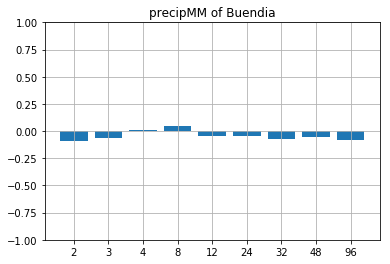

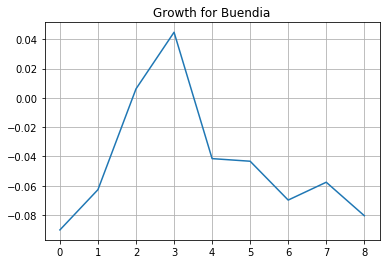

precipMM for Road: Edsa Extension
precipMM_Rmean=2 : -0.03193289265599155 : 71
precipMM_Rmean=3 : -0.021682263380592245 : 107
precipMM_Rmean=4 : -0.02439097251582584 : 143
precipMM_Rmean=8 : 0.003092966381304216 : 179
precipMM_Rmean=12 : -0.01023166777927116 : 215
precipMM_Rmean=24 : -0.01954895697598384 : 251
precipMM_Rmean=32 : -0.037588381822259063 : 287
precipMM_Rmean=48 : -0.034935170547083456 : 323
precipMM_Rmean=96 : -0.01686658022867534 : 359
Max for Road Edsa Extension:0.037588381822259063


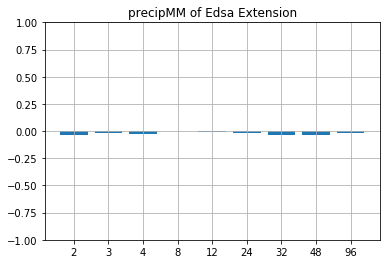

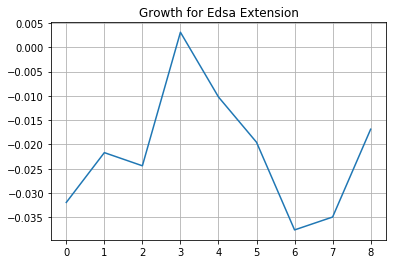

precipMM for Road: Finance Road
precipMM_Rmean=2 : -0.014750783957077785 : 71
precipMM_Rmean=3 : 0.010097759196822455 : 107
precipMM_Rmean=4 : 0.06158708945810563 : 143
precipMM_Rmean=8 : 0.080372688766552 : 179
precipMM_Rmean=12 : 0.02439669212377792 : 215
precipMM_Rmean=24 : 0.014645683001272797 : 251
precipMM_Rmean=32 : 0.03989905550686376 : 287
precipMM_Rmean=48 : 0.0257317539152677 : 323
precipMM_Rmean=96 : -0.03571326860284084 : 359
Max for Road Finance Road:0.080372688766552


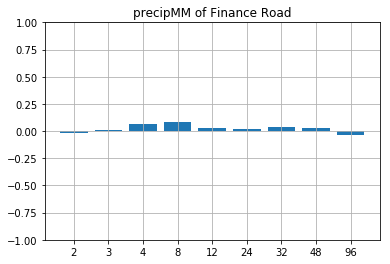

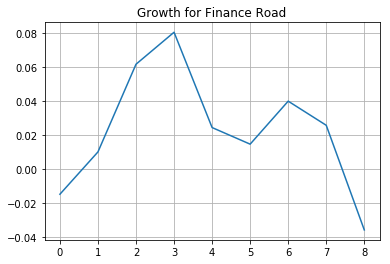

precipMM for Road: Gov. Forbes - Lacson
precipMM_Rmean=2 : -0.040294549138029885 : 71
precipMM_Rmean=3 : -0.035993311809885783 : 107
precipMM_Rmean=4 : -0.02152254996617381 : 143
precipMM_Rmean=8 : -0.03410214157410537 : 179
precipMM_Rmean=12 : -0.036414707536183234 : 215
precipMM_Rmean=24 : -0.031731980682158614 : 251
precipMM_Rmean=32 : -0.017290789255494817 : 287
precipMM_Rmean=48 : 0.0030808019527197553 : 323
precipMM_Rmean=96 : -0.02101731679850206 : 359
Max for Road Gov. Forbes - Lacson:0.040294549138029885


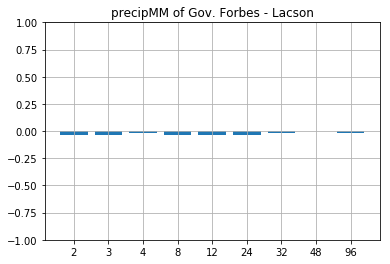

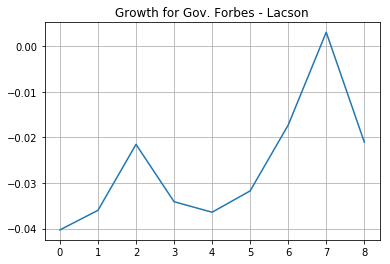

precipMM for Road: Lerma
precipMM_Rmean=2 : 0.20924918490104533 : 71
precipMM_Rmean=3 : 0.17996268739186774 : 107
precipMM_Rmean=4 : 0.1617830837879252 : 143
precipMM_Rmean=8 : 0.025565709608962917 : 179
precipMM_Rmean=12 : 0.16469234588660364 : 215
precipMM_Rmean=24 : 0.07273042783440051 : 251
precipMM_Rmean=32 : 0.16957771519618428 : 287
precipMM_Rmean=48 : 0.2082385609890839 : 323
precipMM_Rmean=96 : 0.2059944664886154 : 359
Max for Road Lerma:0.20924918490104533


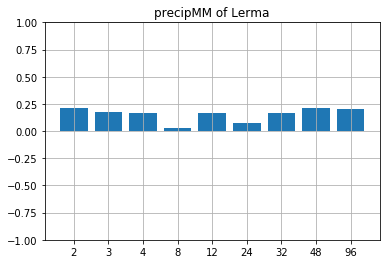

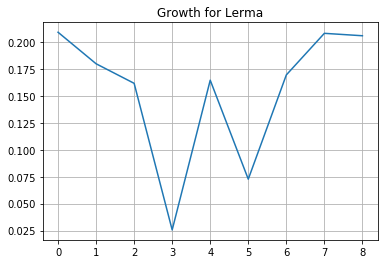

precipMM for Road: Magsaysay Ave
precipMM_Rmean=2 : 0.011716491009935137 : 71
precipMM_Rmean=3 : 0.03831903306200751 : 107
precipMM_Rmean=4 : -0.01033026705197376 : 143
precipMM_Rmean=8 : -0.0017120685623370849 : 179
precipMM_Rmean=12 : 0.001313956976860941 : 215
precipMM_Rmean=24 : 0.07029045097006692 : 251
precipMM_Rmean=32 : 0.05631786273304605 : 287
precipMM_Rmean=48 : 0.03997796389043366 : 323
precipMM_Rmean=96 : 0.033866995593270145 : 359
Max for Road Magsaysay Ave:0.07029045097006692


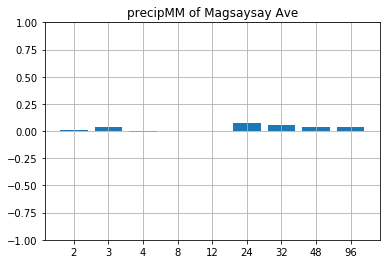

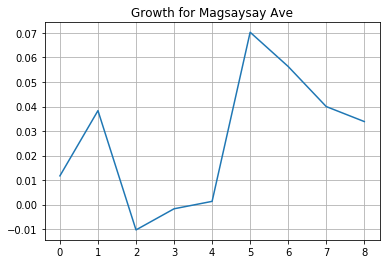

precipMM for Road: P.Noval
precipMM_Rmean=2 : -0.06231580871645755 : 71
precipMM_Rmean=3 : -0.05661168122234165 : 107
precipMM_Rmean=4 : -0.015528452817462547 : 143
precipMM_Rmean=8 : 0.013650381772963316 : 179
precipMM_Rmean=12 : -0.033229463447855566 : 215
precipMM_Rmean=24 : -0.01933995490413248 : 251
precipMM_Rmean=32 : -0.017521249022501656 : 287
precipMM_Rmean=48 : -0.004457691860711611 : 323
precipMM_Rmean=96 : -0.025738134722340843 : 359
Max for Road P.Noval:0.06231580871645755


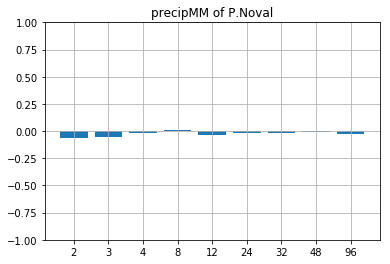

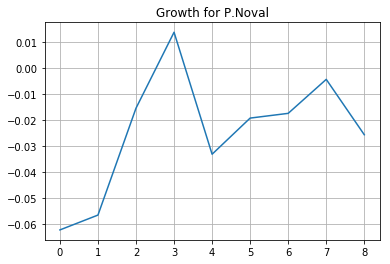

precipMM for Road: Pablo Ocampo
precipMM_Rmean=2 : 0.04054506524086867 : 71
precipMM_Rmean=3 : 0.02013568877730746 : 107
precipMM_Rmean=4 : 0.040268646707024285 : 143
precipMM_Rmean=8 : 0.013390104854277 : 179
precipMM_Rmean=12 : 0.03247756000839452 : 215
precipMM_Rmean=24 : 0.008840086359125785 : 251
precipMM_Rmean=32 : 0.06382198758306372 : 287
precipMM_Rmean=48 : 0.06382292598349014 : 323
precipMM_Rmean=96 : 0.015058092902686069 : 359
Max for Road Pablo Ocampo:0.06382292598349014


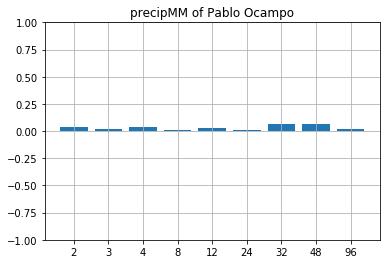

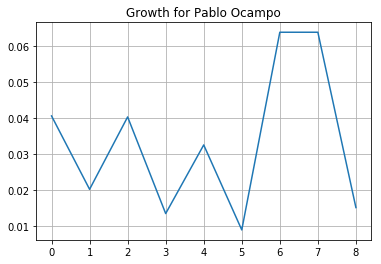

precipMM for Road: Pedro Gil
precipMM_Rmean=2 : -0.03159979776659344 : 71
precipMM_Rmean=3 : -0.0412431956566492 : 107
precipMM_Rmean=4 : 0.008188112609681738 : 143
precipMM_Rmean=8 : 0.0877211417102336 : 179
precipMM_Rmean=12 : -0.02133902968190545 : 215
precipMM_Rmean=24 : 0.02765711398146955 : 251
precipMM_Rmean=32 : 0.020299518523812825 : 287
precipMM_Rmean=48 : 0.0248194196707859 : 323
precipMM_Rmean=96 : 0.008377068094889703 : 359
Max for Road Pedro Gil:0.0877211417102336


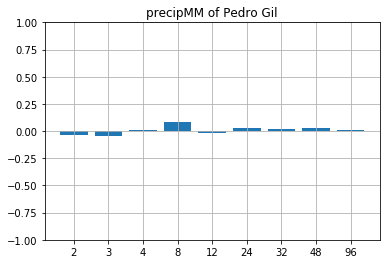

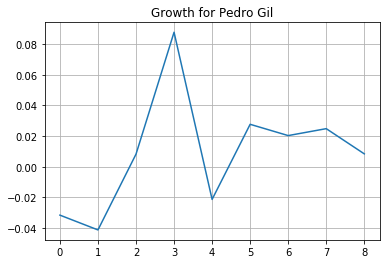

precipMM for Road: Quezon Ave.
precipMM_Rmean=2 : -0.10529372215764217 : 71
precipMM_Rmean=3 : -0.10249384035132507 : 107
precipMM_Rmean=4 : -0.09692543760527933 : 143
precipMM_Rmean=8 : -0.05312447395533092 : 179
precipMM_Rmean=12 : -0.08816492511315217 : 215
precipMM_Rmean=24 : -0.04483558109874049 : 251
precipMM_Rmean=32 : -0.06642690341927032 : 287
precipMM_Rmean=48 : -0.061002535639918073 : 323
precipMM_Rmean=96 : -0.059251153531896375 : 359
Max for Road Quezon Ave.:0.10529372215764217


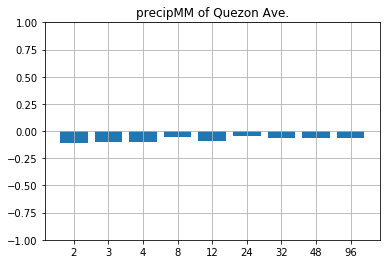

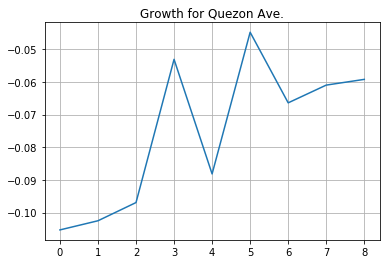

precipMM for Road: Quirino
precipMM_Rmean=2 : -0.05466448408941734 : 71
precipMM_Rmean=3 : -0.054535824626298766 : 107
precipMM_Rmean=4 : -0.002381919921415181 : 143
precipMM_Rmean=8 : -0.03841960009320625 : 179
precipMM_Rmean=12 : -0.05498215783348382 : 215
precipMM_Rmean=24 : -0.050702300571803284 : 251
precipMM_Rmean=32 : -0.017395180325736538 : 287
precipMM_Rmean=48 : -0.007720463062809715 : 323
precipMM_Rmean=96 : -0.07846030704166128 : 359
Max for Road Quirino:0.07846030704166128


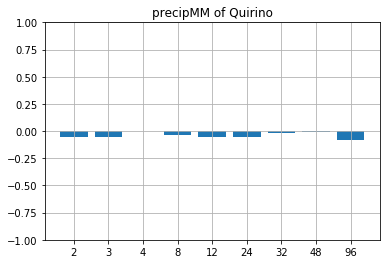

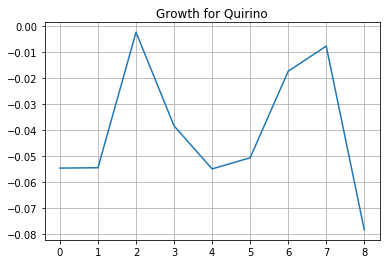

precipMM for Road: Rajah Sulayman
precipMM_Rmean=2 : 0.049676466447214934 : 71
precipMM_Rmean=3 : 0.04934246636367291 : 107
precipMM_Rmean=4 : 0.0632740357911164 : 143
precipMM_Rmean=8 : -0.01866492504030026 : 179
precipMM_Rmean=12 : 0.05524653793387568 : 215
precipMM_Rmean=24 : 0.022088481588999242 : 251
precipMM_Rmean=32 : 0.05496281632570801 : 287
precipMM_Rmean=48 : 0.06438242510678316 : 323
precipMM_Rmean=96 : 0.04795923099447715 : 359
Max for Road Rajah Sulayman:0.06438242510678316


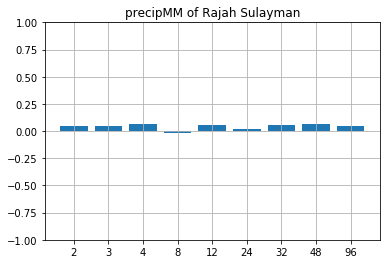

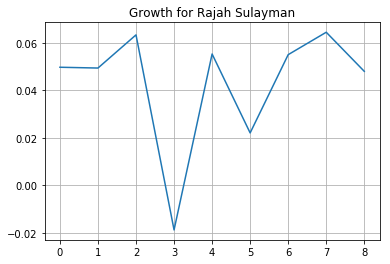

precipMM for Road: Taft Ave.
precipMM_Rmean=2 : -0.013669173861844916 : 71
precipMM_Rmean=3 : -0.02701030753169089 : 107
precipMM_Rmean=4 : -0.05285586357042425 : 143
precipMM_Rmean=8 : -0.12369085087883758 : 179
precipMM_Rmean=12 : -0.031434036778031346 : 215
precipMM_Rmean=24 : -0.048624201017403564 : 251
precipMM_Rmean=32 : 0.014945381345240415 : 287
precipMM_Rmean=48 : 0.03962237860268098 : 323
precipMM_Rmean=96 : 0.020541408005491958 : 359
Max for Road Taft Ave.:0.12369085087883758


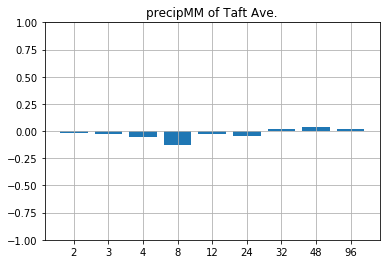

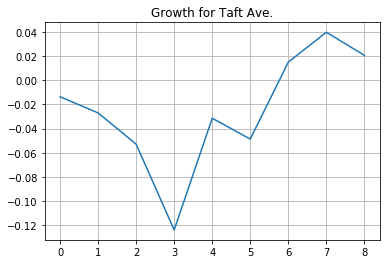

precipMM for Road: U.N. Avenue
precipMM_Rmean=2 : -0.027156440887666663 : 71
precipMM_Rmean=3 : -0.08042958845577314 : 107
precipMM_Rmean=4 : -0.014720924313311652 : 143
precipMM_Rmean=8 : 0.06255480069353637 : 179
precipMM_Rmean=12 : -0.03825925850325259 : 215
precipMM_Rmean=24 : 0.047075122485864825 : 251
precipMM_Rmean=32 : 0.007349096041385031 : 287
precipMM_Rmean=48 : 0.044845375009026266 : 323
precipMM_Rmean=96 : 0.023863009495539773 : 359
Max for Road U.N. Avenue:0.08042958845577314


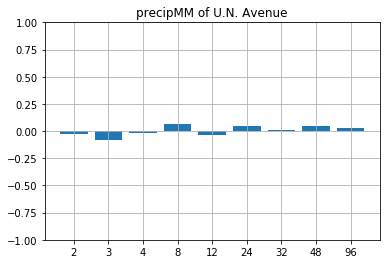

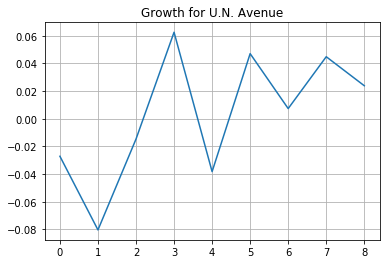

precipMM for Road: Vicente Cruz
precipMM_Rmean=2 : -0.02799943821026785 : 71
precipMM_Rmean=3 : -0.008628583942060078 : 107
precipMM_Rmean=4 : 0.028936751763090095 : 143
precipMM_Rmean=8 : 0.03755649140776615 : 179
precipMM_Rmean=12 : -0.005956898812848535 : 215
precipMM_Rmean=24 : -0.008148811052341947 : 251
precipMM_Rmean=32 : -0.00084331787965422 : 287
precipMM_Rmean=48 : -0.00041619523898266987 : 323
precipMM_Rmean=96 : -0.03439955046887019 : 359
Max for Road Vicente Cruz:0.03755649140776615


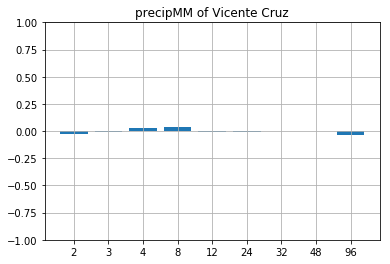

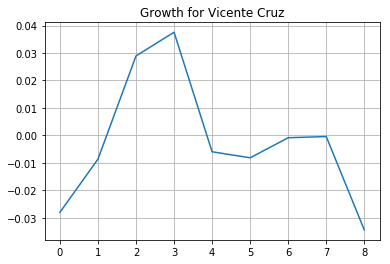

In [601]:
w = 0
r = 0
feature = 'precipMM'
y = []

for r in range(len(ROADS_1)):
    y = []
    print(feature + " for Road: " + ROADS_1[r])
    for w in range(len(WINDOWS)):
        for f in range(3, len(ROADS_SB_CR[r].columns)): 
            if f not in rMean[w]:
                continue
            elif feature not in ROADS_SB_CR[r].columns[f]:
                continue
            print(str(ROADS_SB_CR[r].columns[f]) + " : " + str(ROADS_SB_CR[r].iloc[0, f]) + " : " + str(f))
            y.append(ROADS_SB_CR[r].iloc[0, f])
            
    print("Max for Road " + ROADS_1[r] + ":" + str(np.absolute(y).max()))
    plt.bar(np.arange(len(WINDOWS)), y)
    plt.ylim(ymax=1, ymin=-1)
    plt.xticks(np.arange(len(WINDOWS)), WINDOWS)
    plt.grid()
    plt.title(feature + " of " + ROADS_1[r])
    plt.show()
    
    plt.plot(y)
    plt.grid()
    plt.title("Growth for " + ROADS_1[r])

    plt.show()

#### One Graph = One Feature of All Roads for Window w

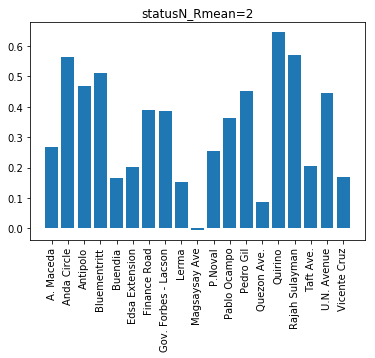

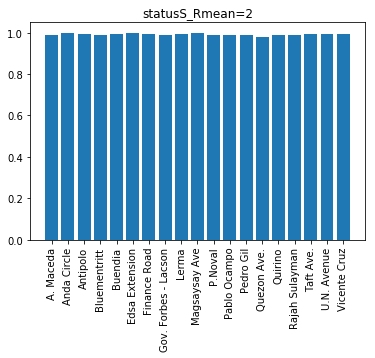

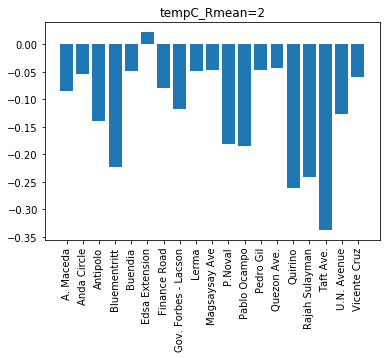

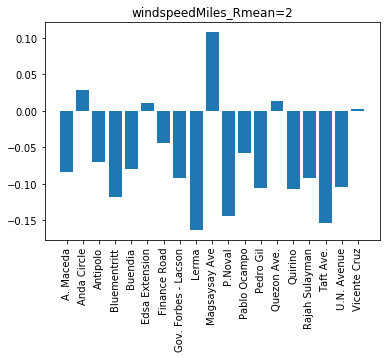

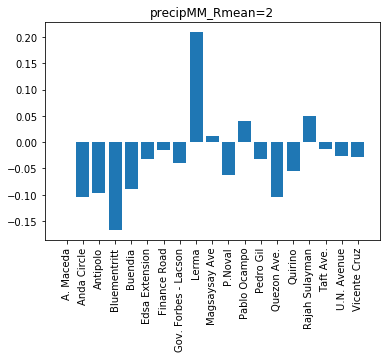

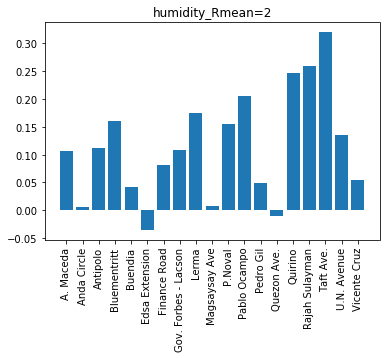

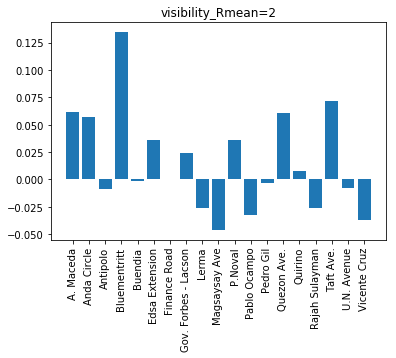

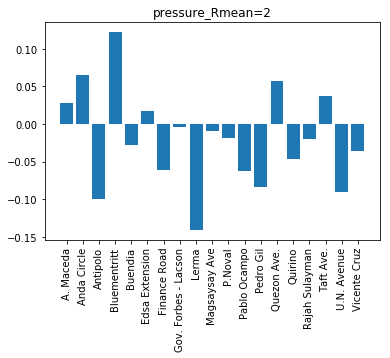

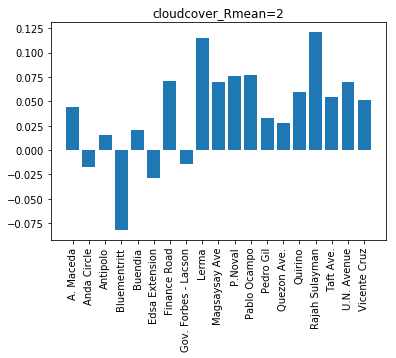

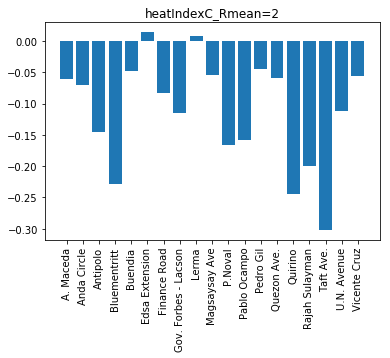

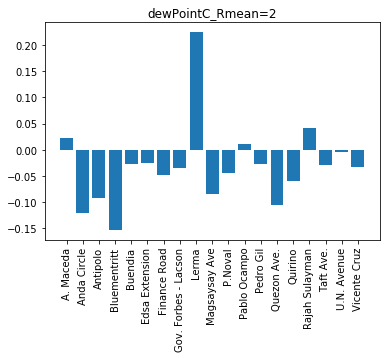

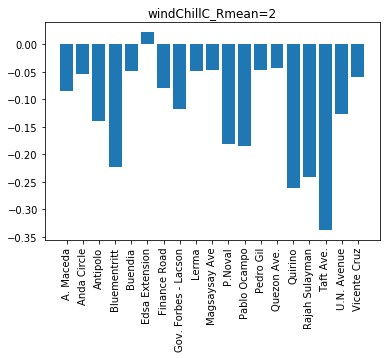

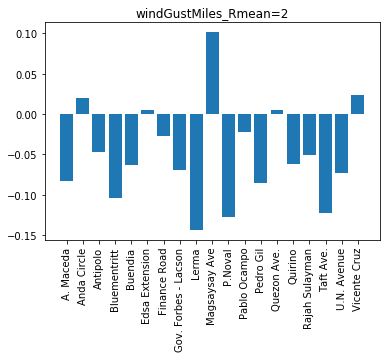

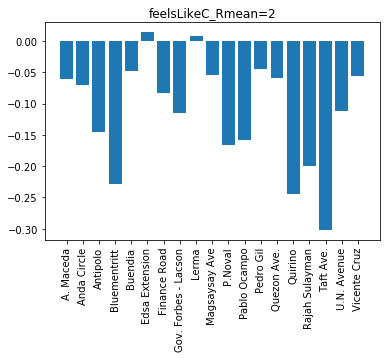

In [602]:
# for W=1
w = 0
r = 0
    
for f in range(3, len(ROADS_SB_CR[0].columns)): 
    y = []
    if f not in rMean[w]:
        continue
    for r in ROADS_SB_CR:
        y.append(r.iloc[0, f])
    plt.bar(ROADS_1, y)
    plt.xticks(rotation='vertical')
    plt.title(ROADS_SB_CR[0].columns[f])
    plt.show()